<a href="https://colab.research.google.com/github/Horax02/Artificial_Vision-Mitnicks/blob/main/Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faster R-CNN
Faster R-CNN is an object detection algorithm introduced by Ren et al. in 2015. It combines a convolutional neural network (CNN) with a region of interest (ROI) based algorithm. This approach has gained popularity due to its accuracy and efficiency in detecting objects in images.

To utilize Faster R-CNN, you need to install several libraries including TensorFlow, Keras, and OpenCV. Additionally, there are specific dependencies required to use the pre-trained model, as shown below:

In [3]:
!pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844490 sha256=5f46e120906250bbe8483a3811c01882a153ebd1d8384fbcb6b38578c48fd48e
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


After setting up all the necessary requirements, we can proceed to download the model and the pre-trained labels to use within our execution environment. The downloaded model provides information about the object's location and its corresponding class. This allows us to generate bounding boxes around the detected objects, along with the class label and a score indicating the model's performance for each detection.

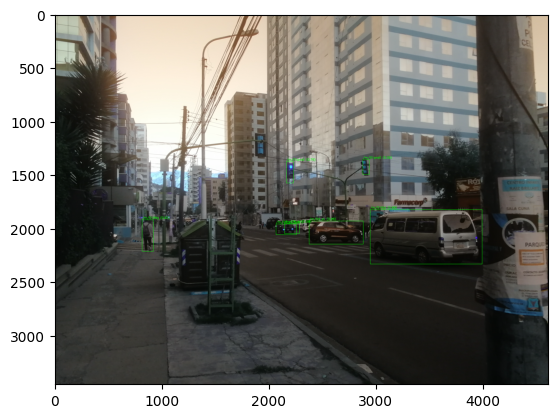

In [33]:
import urllib.request
import tarfile
import os
import cv2
import numpy as np
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import string_int_label_map_pb2
from matplotlib import pyplot as plt

# Download and extract the pre-trained model
model_url = 'http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz'
model_dir = '/content'
model_filename = 'faster_rcnn_resnet50_coco_2018_01_28.tar.gz'
# Download the model file and extract the contents of the file
urllib.request.urlretrieve(model_url, os.path.join(model_dir, model_filename))
tar_file = tarfile.open(os.path.join(model_dir, model_filename))
tar_file.extractall(model_dir)
tar_file.close()
# Paths to model files and load the pre-trained model
model_name = 'faster_rcnn_resnet50_coco_2018_01_28'
model_path = os.path.join(model_dir, model_name, 'saved_model')
model = tf.saved_model.load(model_path)
# Download and upload the label mapping file
label_map_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'
label_map_path = '/content/label_map.pbtxt'
urllib.request.urlretrieve(label_map_url, label_map_path)
label_map = string_int_label_map_pb2.StringIntLabelMap()
with open(label_map_path, 'r') as f:
    text_format.Merge(f.read(), label_map)
categories = label_map.item

# Function for object detection
def detect_objects(image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]
    # Model inference
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)
    num_detections = int(output_dict['num_detections'])
    classes = output_dict['detection_classes'][0].numpy().astype(np.uint8)
    boxes = output_dict['detection_boxes'][0].numpy()
    scores = output_dict['detection_scores'][0].numpy()
    # Filter out detections with high score
    min_score_thresh = 0.5
    valid_indices = np.where(scores > min_score_thresh)[0]
    boxes = boxes[valid_indices]
    classes = classes[valid_indices]
    scores = scores[valid_indices]
    # Show results in the image
    for i in range(len(boxes)):
        ymin, xmin, ymax, xmax = boxes[i]
        class_id = int(classes[i])
        class_name = getattr(categories[class_id], 'name')
        score = scores[i]
        # Show results in the image by adding a bounding box and class text
        height, width, _ = image.shape
        (left, right, top, bottom) = (int(xmin * width), int(xmax * width), int(ymin * height), int(ymax * height))
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, f'{class_name} ({score:.2f})', (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Load test image
image_path = '/content/image prueba 1.jpg'
image = cv2.imread(image_path)
# Perform detection of objects in the image
output_image = detect_objects(image)
plt.imshow(output_image)

After implementing the model, several observations can be made:

* The processing time is quite high due to the computational demands of a high-precision model like Faster R-CNN.

* The output image maintains the same format as the input image, specifically the BGR format, throughout the entire process.

* The classification results are inadequate, and the class names may be incorrect or confusing.

As a result, a thorough review of the implemented model is conducted to achieve more appropriate outcomes. The goal is to improve processing speed while utilizing only the necessary features for the project.

Taking into consideration the remarkable accuracy of the object detection mechanism, it becomes evident that the model is capable of detecting objects in the image, regardless of their distance or size. However, it is important to acknowledge that for the specific context of assisting blind individuals, it may not be necessary to consider or prioritize the detection of these distant or smaller objects. This is primarily due to the fact that the blind person would typically be in close proximity to their immediate surroundings, where objects of immediate relevance and potential obstacles are of utmost importance. Hence, by focusing on the objects within the close range of the blind person's interaction, the system can optimize its performance and provide more relevant and actionable information, enhancing the overall utility and usability of the intelligent cane system.

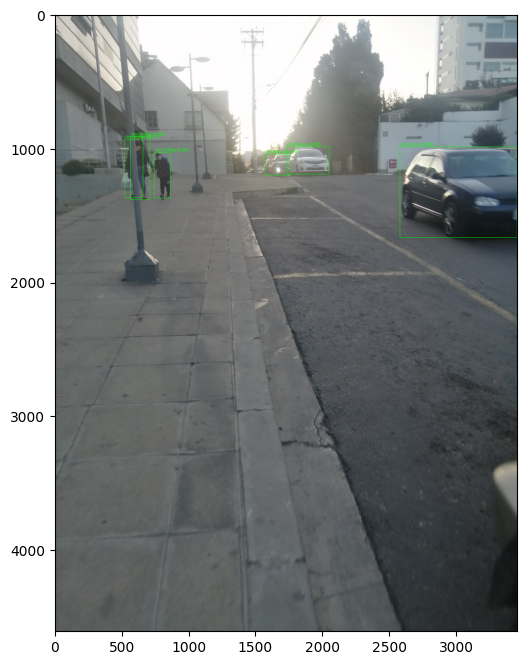

In [36]:
image = cv2.imread('image prueba 2.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
output_image = detect_objects(image)
plt.figure(figsize=(10,8))
plt.imshow(output_image)

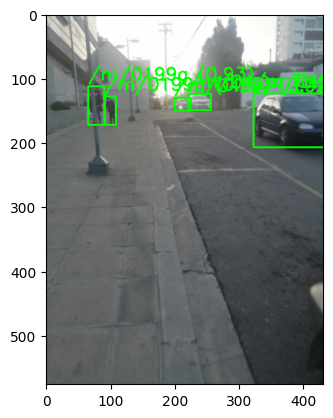

In [48]:
image = cv2.imread('image prueba 2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.pyrDown(image)
image = cv2.pyrDown(image)
image = cv2.pyrDown(image)
output_image = detect_objects(image)
plt.imshow(output_image)

A resizing operation is applied to the image, so that the computational cost can be reduced and the image processing is accelerated, the applied function is `pyrDown()` of openCV, which allows resizing the image applying different processing methods to do so, in this way the most representative characteristics are maintained and the loss of information is minimal.

The next point to deal with is the classification labels, to understand how they work and to perform the classification properly since there are some objects that are detected to guide the person on the street and other objects for functionalities other than the cane. Then we proceed to edit the code of the object detection function:

In [59]:
# Show the categories into which the model can classify objects
print(categories)

[name: "/m/01g317"
id: 1
display_name: "person"
, name: "/m/0199g"
id: 2
display_name: "bicycle"
, name: "/m/0k4j"
id: 3
display_name: "car"
, name: "/m/04_sv"
id: 4
display_name: "motorcycle"
, name: "/m/05czz6l"
id: 5
display_name: "airplane"
, name: "/m/01bjv"
id: 6
display_name: "bus"
, name: "/m/07jdr"
id: 7
display_name: "train"
, name: "/m/07r04"
id: 8
display_name: "truck"
, name: "/m/019jd"
id: 9
display_name: "boat"
, name: "/m/015qff"
id: 10
display_name: "traffic light"
, name: "/m/01pns0"
id: 11
display_name: "fire hydrant"
, name: "/m/02pv19"
id: 13
display_name: "stop sign"
, name: "/m/015qbp"
id: 14
display_name: "parking meter"
, name: "/m/0cvnqh"
id: 15
display_name: "bench"
, name: "/m/015p6"
id: 16
display_name: "bird"
, name: "/m/01yrx"
id: 17
display_name: "cat"
, name: "/m/0bt9lr"
id: 18
display_name: "dog"
, name: "/m/03k3r"
id: 19
display_name: "horse"
, name: "/m/07bgp"
id: 20
display_name: "sheep"
, name: "/m/01xq0k1"
id: 21
display_name: "cow"
, name: "/m/0b

In [60]:
def detect_objects(image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]
    # Model inference
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)
    num_detections = int(output_dict['num_detections'])
    classes = output_dict['detection_classes'][0].numpy().astype(np.uint8)
    boxes = output_dict['detection_boxes'][0].numpy()
    scores = output_dict['detection_scores'][0].numpy()
    # Filter out detections with high score
    min_score_thresh = 0.5
    valid_indices = np.where(scores > min_score_thresh)[0]
    boxes = boxes[valid_indices]
    classes = classes[valid_indices]
    scores = scores[valid_indices]
    # Show results in the image
    for i in range(len(boxes)):
        ymin, xmin, ymax, xmax = boxes[i]
        class_id = int(classes[i])
        class_name = getattr(categories[class_id], 'display_name')
        score = scores[i]
        # Show results in the image by adding a bounding box and class text
        height, width, _ = image.shape
        (left, right, top, bottom) = (int(xmin * width), int(xmax * width), int(ymin * height), int(ymax * height))
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, f'{class_name} ({score:.2f})', (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

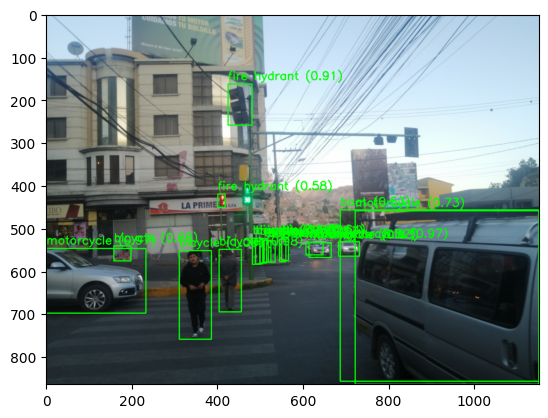

In [63]:
image = cv2.imread('image prueba 3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.pyrDown(image)
image = cv2.pyrDown(image)
output_image = detect_objects(image)
plt.imshow(output_image)

After modifying the displayed message, it becomes apparent that there is an issue with the object classification, displaying a label that comes after the actual one. It is important to acknowledge that a pre-trained model is being utilized, which accounts for this classification error. To address this, a modification is implemented to ensure the correct label is displayed:

In [64]:
def detect_objects(image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]
    # Model inference
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)
    num_detections = int(output_dict['num_detections'])
    classes = output_dict['detection_classes'][0].numpy().astype(np.uint8)
    boxes = output_dict['detection_boxes'][0].numpy()
    scores = output_dict['detection_scores'][0].numpy()
    # Filter out detections with high score
    min_score_thresh = 0.5
    valid_indices = np.where(scores > min_score_thresh)[0]
    boxes = boxes[valid_indices]
    classes = classes[valid_indices]
    scores = scores[valid_indices]
    # Show results in the image
    for i in range(len(boxes)):
        ymin, xmin, ymax, xmax = boxes[i]
        class_id = int(classes[i])
        class_name = getattr(categories[class_id-1], 'display_name')
        score = scores[i]
        # Show results in the image by adding a bounding box and class text
        height, width, _ = image.shape
        (left, right, top, bottom) = (int(xmin * width), int(xmax * width), int(ymin * height), int(ymax * height))
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, f'{class_name} ({score:.2f})', (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

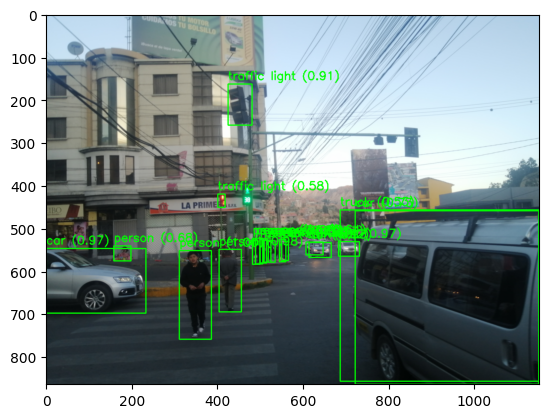

In [65]:
image = cv2.imread('image prueba 3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.pyrDown(image)
image = cv2.pyrDown(image)
output_image = detect_objects(image)
plt.imshow(output_image)

Once the classification is corrected, it is emphasized that being a pre-trained test model it is not possible to generate the performance metrics but the function allows to give a score to each detection with a value shown in each image as a percentage.